In [1]:
location_id = 'FIPS:36'  #25:Massachusets,  44:Rhode Island, 36:New York
dataset_id = 'GHCND' # Daily summaries

project_location = [42.789681,-73.939026]

In [2]:
import os
import requests
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns

token = os.environ.get('NOAA_KEY')
creds = dict(token=token)
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'
url_stations = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations'
url_locations = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/locations/'
todays_date = dt.date.today()
#last_month = todays_date.replace(day=1)-dt.timedelta(days=1)
end_date = (todays_date-dt.timedelta(days=90)).strftime('%Y-%m-%d')
start_date = (todays_date-relativedelta(years=10)).strftime('%Y-%m-%d')
#print(end_date,start_date)

def get_noaa_data(url, data_type, header):
    r = requests.get(url=url+data_type, headers=header)
    if r.status_code != 200:
        print("Error: " + str(r.status_code))
    else:
        r = r.json()
        #print(r)
        try:
            df = pd.DataFrame.from_dict(r['results'], orient='columns')
        except:
            column_names = ['date','datatype','station','attributes','value']
            df = pd.DataFrame(columns=column_names)
        #print(df)
#         try:
#             print(r['results'])
#         except KeyError:
#             print(r)
        return df

def get_stations_info(locationid, datasetid, mytoken, url, station_id):
    station = 'locationid=' + str(locationid)+'&'+'datasetid='+str(datasetid)+'&'+'id='+station_id+'&'+'units=standard'+'&'+'limit=1000'
    r = requests.get(url,headers=mytoken, params=station)
    print('Request status code: '+ str(r.status_code))
    # print(r)
    try:
        df = pd.DataFrame.from_dict(r.json()['results'])
        print('Successfully retrieved '+ str(len(df['id'].unique()))+" stations")
        
        if df.count().max() >=1000:
            print('Warning: MAXIMUM data limit was reached (limit=1000)')
            
        return df
    except:
        print('Error converting station data to dataframe. Missing data?')

def get_stations_within_state(locationid, datasetid, mytoken, url):
    parameters = 'locationid=' + str(locationid)+'&'+'datasetid='+str(datasetid)+'&'+'&'+'units=standard'+'&'+'limit=1000'
    r = requests.get(url_stations,headers=mytoken, params=parameters)
    print('Request status code: '+ str(r.status_code))
    # print(r)
    try:
        df = pd.DataFrame.from_dict(r.json()['results'])
        print('Successfully retrieved '+ str(len(df['id'].unique()))+" stations")
        
        if df.count().max() >=1000:
            print('Warning: MAXIMUM data limit was reached (limit=1000)')
            
        return df
    except:
        print('Error converting station data to dataframe. Missing data?')

from math import radians, cos, sin, asin, sqrt

def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    #km = 6371* c
    mi = 3963 * c
    return mi

def find_nearest(lat, long):
    distances = hotels.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return hotels.loc[distances.idxmin(), 'name']


In [3]:
state_stations = get_stations_within_state(location_id, dataset_id, creds, url_stations)
state_stations

Request status code: 200
Successfully retrieved 1000 stations


,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
0,445.0,2007-11-17,2021-09-19,42.666960,"ALTAMONT 2.7 SSW, NY US",0.9765,GHCND:US1NYAB0001,METERS,-74.050880
1,88.7,2008-09-11,2019-08-12,42.719762,"SCHENECTADY 5.6 SSW, NY US",0.9842,GHCND:US1NYAB0006,METERS,-73.930371
2,488.3,2008-10-28,2021-09-19,42.545481,"RENSSELAERVILLE 2.1 NNW, NY US",0.8225,GHCND:US1NYAB0010,METERS,-74.147484
3,104.2,2009-06-11,2009-12-12,42.759030,"LATHAM 1.1 NNE, NY US",0.6270,GHCND:US1NYAB0016,METERS,-73.737020
4,65.5,2009-07-01,2016-08-26,42.667763,"ALBANY 0.7 E, NY US",0.1978,GHCND:US1NYAB0017,METERS,-73.785573
...,...,...,...,...,...,...,...,...,...
995,408.4,1906-01-01,2021-07-31,44.719200,"DANNEMORA, NY US",0.9790,GHCND:USC00301966,METERS,-73.720500
996,201.2,1917-07-01,2021-09-17,42.564770,"DANSVILLE, NY US",0.9522,GHCND:USC00301974,METERS,-77.717620
997,411.5,1948-05-01,1951-09-16,42.466670,"DAVENPORT 2 E, NY US",0.8655,GHCND:USC00301987,METERS,-74.800000
998,6.1,1890-03-01,1892-02-29,40.883056,"DAVIDS ISLAND, NY US",1.0000,GHCND:USC00302001,METERS,-73.768333


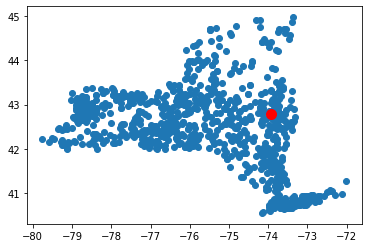

In [4]:
plt.scatter(state_stations.longitude, state_stations.latitude)
plt.scatter(project_location[1], project_location[0], color='r', s=100)

Sort stations by distance

In [5]:
state_stations['distance'] = state_stations.apply(lambda row: dist(project_location[1],project_location[0],row.longitude,row.latitude), axis=1) 
#for i in range(len(df_stations))]
#min_distance = min(distances)
#print(str(round(min_distance,3)) + ' mi')
#state_stations

state_stations.sort_values('distance')

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude,distance
564,108.8,2018-04-02,2021-09-02,42.765023,"SCHENECTADY 2.7 SSW, NY US",0.1752,GHCND:US1NYSC0025,METERS,-73.942937,0.543847
1,88.7,2008-09-11,2019-08-12,42.719762,"SCHENECTADY 5.6 SSW, NY US",0.9842,GHCND:US1NYAB0006,METERS,-73.930371,1.466101
563,102.1,2016-06-25,2021-09-19,42.788626,"ROTTERDAM 0.9 NW, NY US",0.6921,GHCND:US1NYSC0020,METERS,-73.966719,1.915559
567,125.0,2020-06-22,2021-09-19,42.815191,"SCHENECTADY 1.6 NE, NY US",0.9319,GHCND:US1NYSC0029,METERS,-73.902583,2.567603
559,83.5,2008-09-10,2021-09-19,42.844727,"SCOTIA 1.1 NW, NY US",0.6786,GHCND:US1NYSC0002,METERS,-73.974841,2.691433
...,...,...,...,...,...,...,...,...,...,...
93,207.3,2014-05-01,2021-09-19,42.444141,"FREDONIA 0.8 WNW, NY US",0.8185,GHCND:US1NYCQ0022,METERS,-79.346077,374.030766
947,405.4,1940-06-16,1943-10-31,42.216667,"CHAUTAUQUA, NY US",0.4655,GHCND:USC00301395,METERS,-79.466667,382.436590
100,432.2,2020-07-15,2021-09-19,42.251940,"MAYVILLE 0.2 ESE, NY US",0.9815,GHCND:US1NYCQ0041,METERS,-79.498090,384.596839
89,477.0,2011-03-28,2013-10-03,42.162067,"SHERMAN 0.4 ENE, NY US",0.7514,GHCND:US1NYCQ0015,METERS,-79.588517,390.881304


In [6]:
nearest_station = state_stations.sort_values('distance').iloc[1]

In [7]:
#nearest_station = state_stations.iloc[state_stations['distance'].idxmin()]
nearest_station.id

'GHCND:US1NYAB0006'

In [8]:
sta_id = nearest_station.id

#all_dtype = 'data?' + 'datasetid=GSOM&stationid=' + sta_id + \
#        '&startdate=2010-05-01&enddate=2019-05-01&limit=1000&includemetadata=false' #returns all data
rain_dtype = 'data?' + 'datasetid=GSOM&stationid=' + sta_id + \
        '&startdate='+start_date+'&enddate='+end_date+'&limit=1000&includemetadata=false&datatypeid=DP1X' #raindays>=1"
snow_dtype = 'data?' + 'datasetid=GSOM&stationid=' + sta_id + \
        '&startdate='+start_date+'&enddate='+end_date+'&limit=1000&includemetadata=false&datatypeid=DSNW' #snowdays>=1"
hot_dtype = 'data?' + 'datasetid=GSOM&stationid=' + sta_id + \
        '&startdate='+start_date+'&enddate='+end_date+'&limit=1000&includemetadata=false&datatypeid=DX90' #hotdays>=90 degrees"
cold_dtype = 'data?' + 'datasetid=GSOM&stationid=' + sta_id + \
        '&startdate='+start_date+'&enddate='+end_date+'&limit=1000&includemetadata=false&datatypeid=DX32' #colddays<=32 degrees"

# print(url+snow_dtype)
#all_data = get_noaa_data(url, all_dtype, creds)
rain_days = get_noaa_data(url, rain_dtype, creds)
snow_days = get_noaa_data(url, snow_dtype, creds)
hot_days = get_noaa_data(url, hot_dtype, creds)
cold_days = get_noaa_data(url, cold_dtype, creds)

In [9]:
nearest_station

elevation                              88.7
mindate                          2008-09-11
maxdate                          2019-08-12
latitude                            42.7198
name             SCHENECTADY 5.6 SSW, NY US
datacoverage                         0.9842
id                        GHCND:US1NYAB0006
elevationUnit                        METERS
longitude                          -73.9304
distance                             1.4661
Name: 1, dtype: object

In [10]:
#month_mask = rain_days.index.map(lambda x: x.month)==2
#rain_days[rain_days.index.month.isin([2,5])]
len(rain_days)

93

In [11]:
snow_days.head(10)

,date,datatype,station,attributes,value
0,2012-01-01T00:00:00,DSNW,GHCND:US1NYAB0006,"1,N",2
1,2012-02-01T00:00:00,DSNW,GHCND:US1NYAB0006,",N",0
2,2013-02-01T00:00:00,DSNW,GHCND:US1NYAB0006,"3,N",2
3,2013-03-01T00:00:00,DSNW,GHCND:US1NYAB0006,"1,N",4
4,2013-12-01T00:00:00,DSNW,GHCND:US1NYAB0006,"3,N",1
5,2014-01-01T00:00:00,DSNW,GHCND:US1NYAB0006,",N",5
6,2014-02-01T00:00:00,DSNW,GHCND:US1NYAB0006,"1,N",5
7,2014-03-01T00:00:00,DSNW,GHCND:US1NYAB0006,",N",1
8,2014-12-01T00:00:00,DSNW,GHCND:US1NYAB0006,"5,N",2
9,2015-01-01T00:00:00,DSNW,GHCND:US1NYAB0006,",N",5


In [12]:
cold_days = cold_days.loc[cold_days.value > 0]

In [13]:
cold_days.tail()

,date,datatype,station,attributes,value


In [14]:
hot_days = hot_days.loc[hot_days.value > 0]

In [15]:
hot_days.tail()

,date,datatype,station,attributes,value


In [16]:
# sns.lineplot(x='date', y='value', data=rain_days)
# sns.lineplot(x='date', y='value', data=snow_days)
# sns.lineplot(x='date', y='value', data=hot_days)
# sns.lineplot(x='date', y='value', data=cold_days)
# plt.xticks(rotation=15)
# plt.show()

In [17]:

rain_days['date'] = pd.to_datetime(rain_days['date'])
snow_days['date'] = pd.to_datetime(snow_days['date'])
hot_days['date'] = pd.to_datetime(hot_days['date'])
cold_days['date'] = pd.to_datetime(cold_days['date'])

In [18]:
rain_days.head()

,date,datatype,station,attributes,value
0,2011-10-01,DP1X,GHCND:US1NYAB0006,",N",2
1,2011-11-01,DP1X,GHCND:US1NYAB0006,",N",1
2,2011-12-01,DP1X,GHCND:US1NYAB0006,",N",1
3,2012-01-01,DP1X,GHCND:US1NYAB0006,",N",0
4,2012-02-01,DP1X,GHCND:US1NYAB0006,",N",0


In [19]:
hot_days.head()

,date,datatype,station,attributes,value


In [20]:
try: 
    rain_days = rain_days.set_index('date')
except:
    print('no rain data')
try: 
    snow_days = snow_days.set_index('date')
except:
    print('no snow data')
try: 
    hot_days = hot_days.set_index('date')
except:
    print('no hot data')
try: 
    cold_days = cold_days.set_index('date')
except:
    print('no cold data')

In [21]:
rain_days.head(10)

,datatype,station,attributes,value
date,,,,
2011-10-01,DP1X,GHCND:US1NYAB0006,",N",2
2011-11-01,DP1X,GHCND:US1NYAB0006,",N",1
2011-12-01,DP1X,GHCND:US1NYAB0006,",N",1
2012-01-01,DP1X,GHCND:US1NYAB0006,",N",0
2012-02-01,DP1X,GHCND:US1NYAB0006,",N",0
2012-03-01,DP1X,GHCND:US1NYAB0006,",N",1
2012-04-01,DP1X,GHCND:US1NYAB0006,",N",2
2012-05-01,DP1X,GHCND:US1NYAB0006,",N",0
2012-06-01,DP1X,GHCND:US1NYAB0006,"1,N",1


In [22]:
try:
    rain_days.resample('m').mean()
except:
    print('no rain data')
try:
    snow_days.resample('m').mean()
except:
    print('no snow data')
try:
    hot_days.resample('m').mean()
except:
    print('no hot data')
try:
    cold_days.resample('m').mean()
except:
    print('no cold data')

In [23]:
rain_days.head()

,datatype,station,attributes,value
date,,,,
2011-10-01,DP1X,GHCND:US1NYAB0006,",N",2
2011-11-01,DP1X,GHCND:US1NYAB0006,",N",1
2011-12-01,DP1X,GHCND:US1NYAB0006,",N",1
2012-01-01,DP1X,GHCND:US1NYAB0006,",N",0
2012-02-01,DP1X,GHCND:US1NYAB0006,",N",0


In [24]:
hot_days.head()

,datatype,station,attributes,value
date,,,,


In [28]:
rain_months = rain_days.index.month_name() #month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
              'December']
rain_months = pd.Categorical(rain_months, ordered=True, categories=month_order)
rain_months.sort_values()

snow_months = snow_days.index.month_name() #month
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
#              'December']
snow_months = pd.Categorical(snow_months, ordered=True, categories=month_order)
snow_months.sort_values()

hot_months = hot_days.index.month_name() #month
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
 #             'December']
hot_months = pd.Categorical(hot_months, ordered=True, categories=month_order)
hot_months.sort_values()

cold_months = cold_days.index.month_name() #month
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
 #             'December']
cold_months = pd.Categorical(cold_months, ordered=True, categories=month_order)
cold_months.sort_values()

[], Categories (12, object): [January < February < March < April ... September < October < November < December]

In [29]:
try:
    monthly_rain_days = pd.DataFrame(round(rain_days.groupby(rain_months).value.mean()))
except:
    print('no rain data, creating empty dataframe')
    monthly_rain_days = pd.DataFrame(columns = ['value'])
try:
    monthly_snow_days = pd.DataFrame(round(snow_days.groupby(snow_months).value.mean()))
except:
    print('no snow data, creating empty dataframe')
    monthly_snow_days = pd.DataFrame(columns = ['value'])
    
try:
    monthly_hot_days = pd.DataFrame(round(hot_days.groupby(hot_months).value.mean()))
except:
    print('no hot data, creating empty dataframe')
    monthly_hot_days = pd.DataFrame(columns = ['value'])
try:
    monthly_cold_days = pd.DataFrame(round(cold_days.groupby(cold_months).value.mean()))
except:
    print('no cold data, creating empty dataframe')
    monthly_cold_days = pd.DataFrame(columns = ['value'])

no hot data, creating empty dataframe
no cold data, creating empty dataframe


In [30]:
from numpy import *
nans = isnan(monthly_rain_days)
monthly_rain_days[nans] = 0
monthly_rain_days

,value
January,0.0
February,0.0
March,0.0
April,1.0
May,0.0
June,2.0
July,1.0
August,1.0
September,1.0
October,1.0


In [31]:
try:
    nans = isnan(monthly_snow_days)
    monthly_snow_days[nans] = 0
    monthly_snow_days
except:
    print('no snow data')

In [32]:
try:
    nans = isnan(monthly_hot_days)
    monthly_hot_days[nans] = 0
    monthly_hot_days
except:
    print('no hot data')
    

no hot data


In [33]:
try:
    nans = isnan(monthly_cold_days)
    monthly_cold_days[nans] = 0
    monthly_cold_days
except:
    print('no cold data')

no cold data


In [34]:
#monthly_rain_days.index

CategoricalIndex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
                 categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', ...], ordered=True, dtype='category')

In [35]:
dataframes = [monthly_rain_days, monthly_snow_days, monthly_hot_days, monthly_cold_days]
column_names = ['rain', 'snow', 'hot>90', 'cold<32']
df_merged = pd.concat(dataframes, join='outer', axis=1)
df_merged.columns = column_names
df_merged.fillna(0, inplace=True)
df_merged

,rain,snow,hot>90,cold<32
January,0.0,3.0,0,0
February,0.0,4.0,0,0
March,0.0,3.0,0,0
April,1.0,0.0,0,0
May,0.0,0.0,0,0
June,2.0,0.0,0,0
July,1.0,0.0,0,0
August,1.0,0.0,0,0
September,1.0,0.0,0,0
October,1.0,0.0,0,0


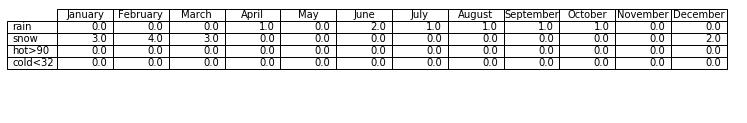

In [36]:
fig, ax = plt.subplots(figsize=(12,2))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)


tab = table(ax, df_merged.T, loc='upper right')
tab.auto_set_font_size(False)
tab.set_fontsize(10)

plt.savefig('G:/My Drive/Work/Ferreira/avg_weather_days_table.png')

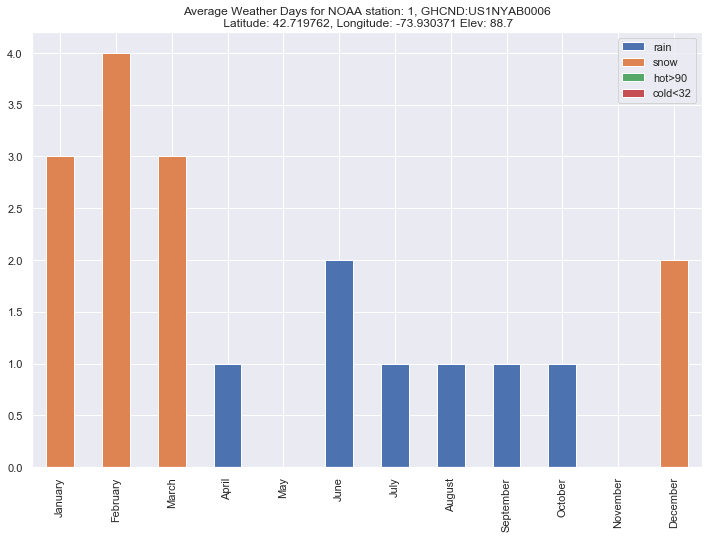

In [37]:
sns.set()
ax = df_merged.plot(kind='bar', stacked=True, figsize=(12,8)).set_title('Average Weather Days for NOAA station: '
                                                                        + str(nearest_station.name) + ', '
                                                                        + nearest_station.id + '\n Latitude: '
                                                                        + str(nearest_station.latitude)
                                                                        + ', Longitude: ' + str(nearest_station.longitude)
                                                                        + ' Elev: ' + str(nearest_station.elevation)
                                                                       )

ax.figure.savefig("G:/My Drive/Work/Ferreira/avg_weather_days.png")